# Machine Learning

### Objectives

Perform EDA and determine training labels
- create a column for the class
- standardize the data
- split into training and test data

### Import Libraries and Define Auxiliary Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [3]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(10)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,6.0,3325.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7.0,2296.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,8.0,1316.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9.0,4535.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,10.0,4428.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Task 1: Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then assign it  to the variable <code>Y</code>, make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [5]:
y = data['Class'].to_numpy()

### Task 2: Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code>.

In [6]:
transform = preprocessing.StandardScaler()

In [7]:
X = transform.fit(X).transform(X)

### Task 3: Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

<code>X_train, X_test, Y_train, Y_test</code>

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
Y_test.shape

(18,)

### Task 4: Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [13]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()

In [14]:
gs_cv = GridSearchCV(lr, parameters, scoring='accuracy', cv=10)
logreg_cv = gs_cv.fit(X_train, Y_train)

In [15]:
print("Tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("Accuracy for logistic regression:", logreg_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for logistic regression: 0.8464285714285713


### Task 5: Calculate the accuracy on the test data using the method <code>score</code>.

In [16]:
print('Accuracy for logistic regression using the method score:', logreg_cv.score(X_test, Y_test))

Accuracy for logistic regression using the method score: 0.8333333333333334


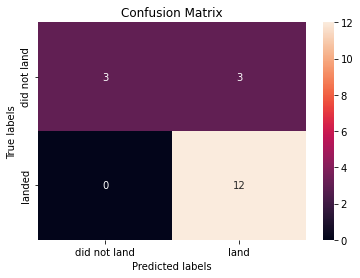

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

You can see the false positives are the main problem.

### Task 6: Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [19]:
gs_cv = GridSearchCV(svm,parameters, scoring='accuracy', cv=10)
svm_cv = gs_cv.fit(X_train, Y_train)

In [20]:
print("Tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("Accuracy for support vector machine:", svm_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy for support vector machine: 0.8482142857142856


### Task 7: Calculate the accuracy on the test data using the method <code>score</code>.

In [21]:
print("Accuracy for support vector machine on the test data using the method score:", svm_cv.score(X_test, Y_test))

Accuracy for support vector machine on the test data using the method score: 0.8333333333333334


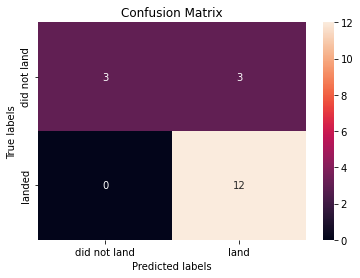

In [22]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Task 8: Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [23]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [24]:
gs_cv = GridSearchCV(tree,parameters, scoring='accuracy', cv=10)
tree_cv = gs_cv.fit(X_train, Y_train)

In [25]:
print("Tuned hpyerparameters :(best parameters) ", tree_cv.best_params_)
print("Accuracy for decision tree classifier:", tree_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy for decision tree classifier: 0.9017857142857142


### Task 9: Calculate the accuracy of tree_cv on the test data using the method <code>score</code>.

In [26]:
print("Accuracy for decision tree classifier on the test data using the method score:", tree_cv.score(X_test, Y_test))

Accuracy for decision tree classifier on the test data using the method score: 0.7222222222222222


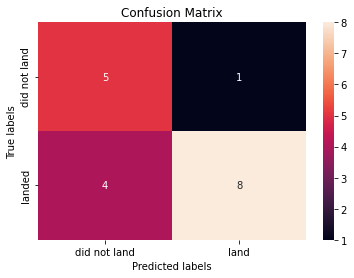

In [28]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Task 10: Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [29]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [30]:
gs_cv = GridSearchCV(KNN, parameters, scoring='accuracy', cv=10)
knn_cv = gs_cv.fit(X_train, Y_train)

In [31]:
print("Tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("Accuracy for k nearest neighbors:",knn_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy for k nearest neighbors: 0.8482142857142858


### Task 11: Calculate the accuracy of knn_cv on the test data using the method <code>score</code>.

In [32]:
print("Accuracy for k nearest neighbors on the test data using the method score: ",knn_cv.score(X_test, Y_test))

Accuracy for k nearest neighbors on the test data using the method score:  0.8333333333333334


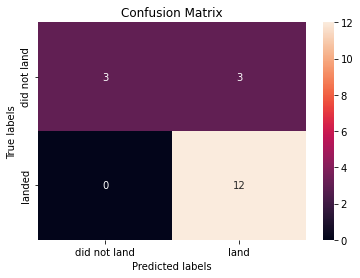

In [33]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Task 12: Find the method performs best.

In [34]:
algorithms = {'KNN':knn_cv.best_score_,'Decision Tree':tree_cv.best_score_,'Logistic Regression':logreg_cv.best_score_,'SVM':svm_cv.best_score_}
best_algorithm = max(algorithms, key= lambda x: algorithms[x])

print('The method which performs best is \"',best_algorithm,'\" with a score of',algorithms[best_algorithm])

The method which performs best is " Decision Tree " with a score of 0.9017857142857142


In [37]:
algo_df = pd.DataFrame.from_dict(algorithms, orient='index', columns=['Accuracy'])
algo_df.sort_values(['Accuracy'], inplace=True)
algo_df

,Accuracy
Logistic Regression,0.846429
SVM,0.848214
KNN,0.848214
Decision Tree,0.901786
